<a href="https://colab.research.google.com/github/supriyakarande/Machine-Learning/blob/master/stock_with_ARMIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import requests
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt


url_symbols ="https://archives.nseindia.com/content/equities/EQUITY_L.csv"
r = requests.get(url_symbols)
with open("EQUITY_L.csv", 'wb') as f:
      f.write(r.content)
data =pd.read_csv("EQUITY_L.csv")
data=data['SYMBOL']
codelist=data.values.tolist()

endtime =int(time.time())
starttime=int(time.time())-86400*365  #one year back
for code in codelist:
  try:
    url="https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval=1d&events=history".format(code,starttime,endtime)
    r = requests.get(url)
    with open("{}.csv".format(code), 'wb') as f:
      f.write(r.content)
    data =pd.read_csv("{}.csv".format(code),index_col=0)
    data=data['Close']
    data=data.dropna()

    X = data.values
    size = int(len(X) * 0.70)
    #train, test = X[0:size], X[size:len(X)]
    history = [x for x in X]
    predictions = list()
    model = ARIMA(history, order=(10,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    #print(data())
    print("{} : predicted={}".format(code, yhat))
  except:
    print("{}: Please Ignore".format(code))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ACC.NS : predicted=[1237.58503723]
ADANITRANS.NS : predicted=[227.28528258]
AMBUJACEM.NS : predicted=[187.74991484]
ASHOKLEY.NS : predicted=[52.10425619]
AUROPHARMA.NS : predicted=[798.26940326]
DMART.NS : predicted=[2359.92544905]
BAJAJHLDNG.NS : predicted=[2360.98821987]
BANDHANBNK.NS : predicted=[265.40601148]
BANKBARODA.NS : predicted=[45.83973005]
BERGEPAINT.NS : predicted=[504.34238049]
BIOCON.NS : predicted=[407.23996809]
BOSCHLTD.NS : predicted=[10566.91311493]
CADILAHC.NS : predicted=[368.44127939]
COLPAL.NS : predicted=[1356.69985098]
CONCOR.NS : predicted=[393.76542016]
DLF.NS : predicted=[148.4545059]
DABUR.NS : predicted=[438.12732843]
DIVISLAB.NS : predicted=[2329.77917809]
GICRE.NS : predicted=[157.81037067]
GODREJCP.NS : predicted=[625.88428488]
HDFCAMC.NS : predicted=[2391.3237458]
HDFCLIFE.NS : predicted=[503.70615878]
HAVELLS.NS : predicted=[548.25143126]
HINDPETRO.NS : predicted=[218.75479215]
HINDZINC.NS : predicted=[175.41441053]
ICICIGI.NS : predicted=[1296.40046

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


predicted=675.952956, expected=666.849976
Test MSE: 3965.273
[668.59497886]
[673.86400871]
[681.87755134]
[689.87614186]
[688.82441437]


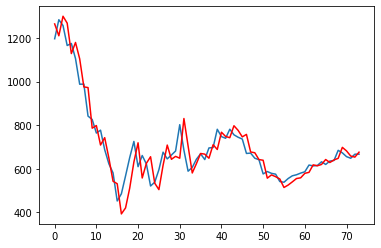

In [ ]:
import time
import requests
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

endtime =int(time.time())
starttime=int(time.time())-86400*365  #one year back
code='SRTRANSFIN.NS'
url="https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval=1d&events=history".format(code,starttime,endtime)
r = requests.get(url)
with open("{}.csv".format(code), 'wb') as f:
  f.write(r.content)
data =pd.read_csv("{}.csv".format(code),index_col=0)
data=data['Close']
data=data.dropna()

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
X = data.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(10,2,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
#print(data())
print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
#plt.show()

#predict in future
#predictions= list()
for i in range(5):
	model = ARIMA(history, order=(10,2,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	history.append(yhat)
	print(yhat)